# BELLABEAT PROJECT

## 1. Business task

### 1.1 Context: 
The company better target their marketing efforts into their customer's needs based on their usage of their fitness smart devices. With this info then make high-level recommendations for how these trends can inform Bellabeat marketing strategy.

### 1.2 Business task:
Given these facts, the business task is defined as searching for user patterns of usage of their smart devices in order to gain insights that would later better orientate marketing decisions. So, in one phrase it would be:

**How do our users use our smart devices?**

## 2. Prepare data

### 2.1 The credibility of the data

The data is public data from FitBit Fitness Tracker Data. It's a dataset from 33 fitbit users that includes minute-level output for physical activity, heart rate, and sleep monitoring. It's a good database segmented in several tables with different aspects of the data of the device with lots of details about the user behaviour.

### 2.2 Importing libraries and data files

In [1]:
#import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data files
daily_activity = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/dailyActivity_merged.csv')
# daily_calories = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/dailyCalories_merged.csv')
# daily_intensity = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/dailyIntensities_merged.csv')
# daily_step = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/dailySteps_merged.csv')
hourly_calories = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/hourlyCalories_merged.csv')
hourly_intensity = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/hourlyIntensities_merged.csv')
sleep_day = pd.read_csv('https://raw.githubusercontent.com/binhnguyen5658/bellabeat_project/main/data/sleepDay_merged.csv')

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


### 2.3 Checking data

In [4]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [6]:
sleep_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


**--> There is no missing values at all datasets**

### 2.4 Transfroming data

* **Merging datasets to daily_data and hourly_data**

In [7]:
# merging daily_activity and sleep_day to daily_data (daily_activity have already has the data of daily_calories, daily_intensity and daily step)
    #create date column for sleep_day
sleep_day['Date'] = pd.to_datetime(sleep_day['SleepDay']).dt.date

    #rename activity date column to date and format datetime for daily_activity
daily_activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
daily_activity['Date'] = pd.to_datetime(daily_activity['Date']).dt.date

    #merging daily activity and sleep day
daily_data = daily_activity.merge(sleep_day, how='left' ,on=['Id','Date']) #daily_activity: 940 rows, sleep_day: 413 rows

# merging hourly_calories, hourly_intesity to hourly_data
hourly_data = hourly_calories.merge(hourly_intensity, on=['Id','ActivityHour'])

In [8]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        943 non-null    int64  
 1   Date                      943 non-null    object 
 2   TotalSteps                943 non-null    int64  
 3   TotalDistance             943 non-null    float64
 4   TrackerDistance           943 non-null    float64
 5   LoggedActivitiesDistance  943 non-null    float64
 6   VeryActiveDistance        943 non-null    float64
 7   ModeratelyActiveDistance  943 non-null    float64
 8   LightActiveDistance       943 non-null    float64
 9   SedentaryActiveDistance   943 non-null    float64
 10  VeryActiveMinutes         943 non-null    int64  
 11  FairlyActiveMinutes       943 non-null    int64  
 12  LightlyActiveMinutes      943 non-null    int64  
 13  SedentaryMinutes          943 non-null    int64  
 14  Calories  

In [9]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.0+ MB


--> Date column type of daily_data and ActivityHour column type of hourly_date are object now, change to datetime datatype

* **Transforming date column format**

In [10]:
# transform Date column format of daily_data
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# transform ActivityHour column format of hourly_data
hourly_data['ActivityHour'] = pd.to_datetime(hourly_data['ActivityHour'])

In [11]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 0 to 942
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        943 non-null    int64         
 1   Date                      943 non-null    datetime64[ns]
 2   TotalSteps                943 non-null    int64         
 3   TotalDistance             943 non-null    float64       
 4   TrackerDistance           943 non-null    float64       
 5   LoggedActivitiesDistance  943 non-null    float64       
 6   VeryActiveDistance        943 non-null    float64       
 7   ModeratelyActiveDistance  943 non-null    float64       
 8   LightActiveDistance       943 non-null    float64       
 9   SedentaryActiveDistance   943 non-null    float64       
 10  VeryActiveMinutes         943 non-null    int64         
 11  FairlyActiveMinutes       943 non-null    int64         
 12  LightlyActiveMinutes  

In [12]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 1.0 MB


## 3. Analyzing

### 3.1 The relationship of calories burned and user types

* **Create data by user types**

In [16]:
# create table of id with user type column
    # set sedentary_mean, lightly_active_mean, fairly_active_mean, very_active_mean
sedentary_mean = daily_data.SedentaryMinutes.mean()
lightly_active_mean = daily_data.LightlyActiveMinutes.mean()
fairly_active_mean = daily_data.FairlyActiveMinutes.mean()
very_active_mean = daily_data.VeryActiveMinutes.mean()

    # group daily_data by Id
col_group = ['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes','Calories']
daily_data_id = daily_data.groupby('Id')[col_group].mean()

    # create User_type column
user_cond = [
    (daily_data_id.VeryActiveMinutes > very_active_mean),
    (daily_data_id.FairlyActiveMinutes > fairly_active_mean),
    (daily_data_id.LightlyActiveMinutes > lightly_active_mean),
    (daily_data_id.SedentaryMinutes > sedentary_mean)      
]

user_type = ['very active', 'fairly active', 'lightly active','sedentary']

daily_data_id['User_type'] = np.select(user_cond, user_type)
    
# create user type table
daily_data_id.reset_index(inplace=True)
data_by_user = daily_data_id.groupby('User_type').agg({'Id':'count','Calories':'mean'})
data_by_user.rename(columns={'Id':'Total_user'}, inplace=True)
data_by_user.reset_index(inplace=True)

In [17]:
daily_data_id.head()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,Calories,User_type
0,1503960366,848.161290,219.935484,19.161290,38.709677,1816.419355,very active
1,1624580081,1257.741935,153.483871,5.806452,8.677419,1483.354839,sedentary
2,1644430081,1161.866667,178.466667,21.366667,9.566667,2811.300000,fairly active
3,1844505072,1206.612903,115.451613,1.290323,0.129032,1573.483871,sedentary
4,1927972279,1317.419355,38.580645,0.774194,1.322581,2172.806452,sedentary


In [18]:
data_by_user

,User_type,Total_user,Calories
0,fairly active,8,2255.179927
1,lightly active,8,2024.938589
2,sedentary,6,1925.251993
3,very active,11,2687.479497


* **Plot of user type**

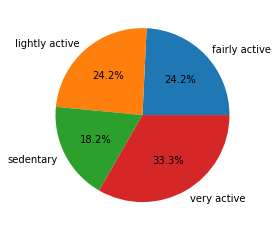

In [20]:
plt.pie(data_by_user.Total_user, 
        labels=data_by_user.User_type, 
        autopct='%.1f%%')
plt.show()

* **Plot of calories burned by user types**

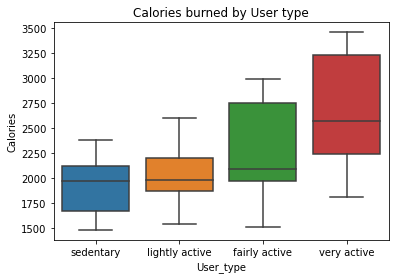

In [21]:
# create plot of Calories burned by user type
sns.boxplot(data=daily_data_id,
            x='User_type', 
            y='Calories', 
            order=['sedentary','lightly active', 'fairly active', 'very active'])
plt.title('Calories burned by User type')
plt.show()

* With the way was used to catogorize user type, the Very active users is 1/3 of all users, the lightly and fairly are 24% and the sedentary is smallest 18%. 
* And the very active users is the ones with more calories burned. That is not surprising, but it confirms that the level of activity is related with the calories burned and it is important for losing weight

### 3.2 The relationship between sleep quality and user type

* **Create data by sleep quality and user type**

In [22]:
# create sleep type data
    # group daily data by id
col_group_2 = ['SedentaryMinutes','LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes','TotalMinutesAsleep']
daily_sleep_id = daily_data.groupby('Id')[col_group_2].mean().dropna()
daily_sleep_id.reset_index(inplace=True)

    # create user type column
sleep_user_cond = [
    (daily_sleep_id.VeryActiveMinutes > very_active_mean),
    (daily_sleep_id.FairlyActiveMinutes > fairly_active_mean),
    (daily_sleep_id.LightlyActiveMinutes > lightly_active_mean),
    (daily_sleep_id.SedentaryMinutes > sedentary_mean)        
]

sleep_user_type = ['very active', 'fairly active', 'lightly active','sedentary']

daily_sleep_id['User_type'] = np.select(sleep_user_cond, sleep_user_type)

    # Create sleep quality column
sleep_qty_cond = [
    (daily_sleep_id.TotalMinutesAsleep < 360), # less than 6 hours 
    (daily_sleep_id.TotalMinutesAsleep >= 360) & (daily_sleep_id.TotalMinutesAsleep <= 480), # 6 - 8 hours
    (daily_sleep_id.TotalMinutesAsleep > 480 ) # more than 8 hours
]
    
sleep_qty_type = ['Bad sleep', 'Normal', 'Over sleep']
    
daily_sleep_id['Sleep_quality'] = np.select(sleep_qty_cond, sleep_qty_type)

    #group user type and sleep quality
daily_sleep_user = daily_sleep_id.groupby(['User_type','Sleep_quality']).agg({'Id':'count'})
daily_sleep_user.rename(columns={'Id':'Total'},inplace=True)
daily_sleep_user.reset_index(inplace=True)

    #calculate total users of each user type
user_type_amount = daily_sleep_user.groupby('User_type').agg({'Total':'sum'})
user_type_amount.reset_index(inplace=True)
user_type_amount.rename(columns={'Total':'Total_user_type'},inplace=True)
    
    # create Pecentage column of sleep quality of each user type
daily_sleep_user = daily_sleep_user.merge(user_type_amount, how='left', on='User_type')
daily_sleep_user['Percentage'] = (daily_sleep_user.Total / daily_sleep_user.Total_user_type) * 100
daily_sleep_user

,User_type,Sleep_quality,Total,Total_user_type,Percentage
0,fairly active,Bad sleep,4,6,66.666667
1,fairly active,Normal,2,6,33.333333
2,lightly active,Bad sleep,1,5,20.000000
3,lightly active,Normal,3,5,60.000000
4,lightly active,Over sleep,1,5,20.000000
5,sedentary,Bad sleep,1,4,25.000000
6,sedentary,Normal,2,4,50.000000
7,sedentary,Over sleep,1,4,25.000000
8,very active,Bad sleep,2,9,22.222222
9,very active,Normal,7,9,77.777778


* **Plot of sleep quality by user type**

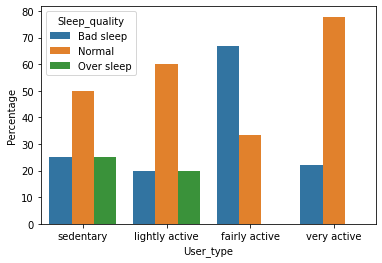

In [23]:
sns.barplot(data=daily_sleep_user, 
            x='User_type', 
            y='Percentage', 
            hue='Sleep_quality', 
            order=['sedentary','lightly active','fairly active','very active'])
plt.show()

The plot shows 3 things very interesting:
* First, the fairly active users have the most bad sleep percentage of compare to other user types.
* Second, except fairly active users, the normal sleep increases from sedentary users to very active users.
* Third, the descrease of over sleep throught the active level, it make sense that the fairly active and very active don't spend much time in bed

## 4. Conclusion

There are some interesting things that I found in this data that I think it will be helpful for targeting marketing message to future consumers:
1. There is relationship between high intensity activity and calories burned, so logging the activity with smart device will be a good motivation to increase user's activity. It's very helpful for the users who need to lose or control weight.

2. The data also show the relationship of the sleep quality and activity level. It could be a good reason for own the smart device to track sleep quality to improve health and life quality

With this results, I recommend to focus the marketing message on the improving sleep and losing weight aspect of the smart device. Using smart device is not only help to track sleep time and activity but aslo encourage the user to get more activity for burning calories and get enough sleep time